Hızlı Çözüm

In [1]:
import numpy as np
import pandas as pd
v1 = np.array([1,3,6,np.NAN,7,1,np.NAN,15,12])
v2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,9])
v3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
dfilk = pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
df = dfilk.copy()
df

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [2]:
df.isnull().sum()#eksik değerlerin sayısı

v1    2
v2    3
v3    2
dtype: int64

In [3]:
df.notnull().sum()#tam olan gözlemlerin sayısı

v1    7
v2    6
v3    7
dtype: int64

In [4]:
df.isnull().sum().sum()#dataframedeki toplam eksik değer sayısı

7

In [5]:
df.isnull()

,v1,v2,v3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [6]:
eksikler = df.isnull()

In [7]:
df[eksikler.any(axis = 1)]
#any argümanı ile satırda en az bir tane eksiklik varsa seçer 

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [8]:
df[~eksikler.any(axis = 1)]

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [9]:
df[df.notnull().all(axis = 1)]#tüm gözlemleri dolu olanları aldık

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [10]:
#eksik değerlerin direk silinme yöntemleri
df.dropna()#bir gözlem biriminde eksik değer varsa o gözlem birimini siler

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [11]:
df

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [12]:
df.dropna(inplace = True)
#değişiklikleri kalıcı hale getirir

In [13]:
df

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [14]:
df.dropna(how = "all")
#bütün sütunları eksik olan satırları siler

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [15]:
#basit değer atama yöntemleri
df = dfilk.copy()
df

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [16]:
df["v1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7    15.0
8    12.0
Name: v1, dtype: float64

In [17]:
df["v1"].mean()

6.428571428571429

In [18]:
df["v1"].fillna(df["v1"].mean())

0     1.000000
1     3.000000
2     6.000000
3     6.428571
4     7.000000
5     1.000000
6     6.428571
7    15.000000
8    12.000000
Name: v1, dtype: float64

In [19]:
df = dfilk.copy()
df

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,15.0,2.0,2.0
8,12.0,9.0,31.0


In [20]:
df.apply(lambda x: x.fillna(x.mean()),axis = 0)
#tüm sütunlarda o sütunun ortalamasını almak için kullanılır.
#axis = 0 bir sütundaki her satır için o işlemi yapar
#axis = 1 bir satırdaki her sütun için o işlemi yapar

,v1,v2,v3
0,1.000000,7.000000,11.0
1,3.000000,7.166667,12.0
2,6.000000,5.000000,5.0
3,6.428571,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,7.166667,7.0
6,6.428571,7.166667,11.0
7,15.000000,2.000000,2.0
8,12.000000,9.000000,31.0


In [21]:
df.fillna(df.mean()[:])

,v1,v2,v3
0,1.000000,7.000000,11.0
1,3.000000,7.166667,12.0
2,6.000000,5.000000,5.0
3,6.428571,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,7.166667,7.0
6,6.428571,7.166667,11.0
7,15.000000,2.000000,2.0
8,12.000000,9.000000,31.0


In [22]:
#eğer bazı değişkenler normal dağılıyor ama bazı değişkenlerin dağılımları sağa veya sola çarpıksa
df.fillna(df.mean()["v1":"v2"])

,v1,v2,v3
0,1.000000,7.000000,NaN
1,3.000000,7.166667,12.0
2,6.000000,5.000000,5.0
3,6.428571,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,7.166667,7.0
6,6.428571,7.166667,NaN
7,15.000000,2.000000,2.0
8,12.000000,9.000000,31.0


In [23]:
df["v3"].fillna(df.median()["v3"])

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: v3, dtype: float64

Eksik Veri Yapısının Görselleştirilmesi

In [24]:
!pip install missingno

In [25]:
import missingno as msno

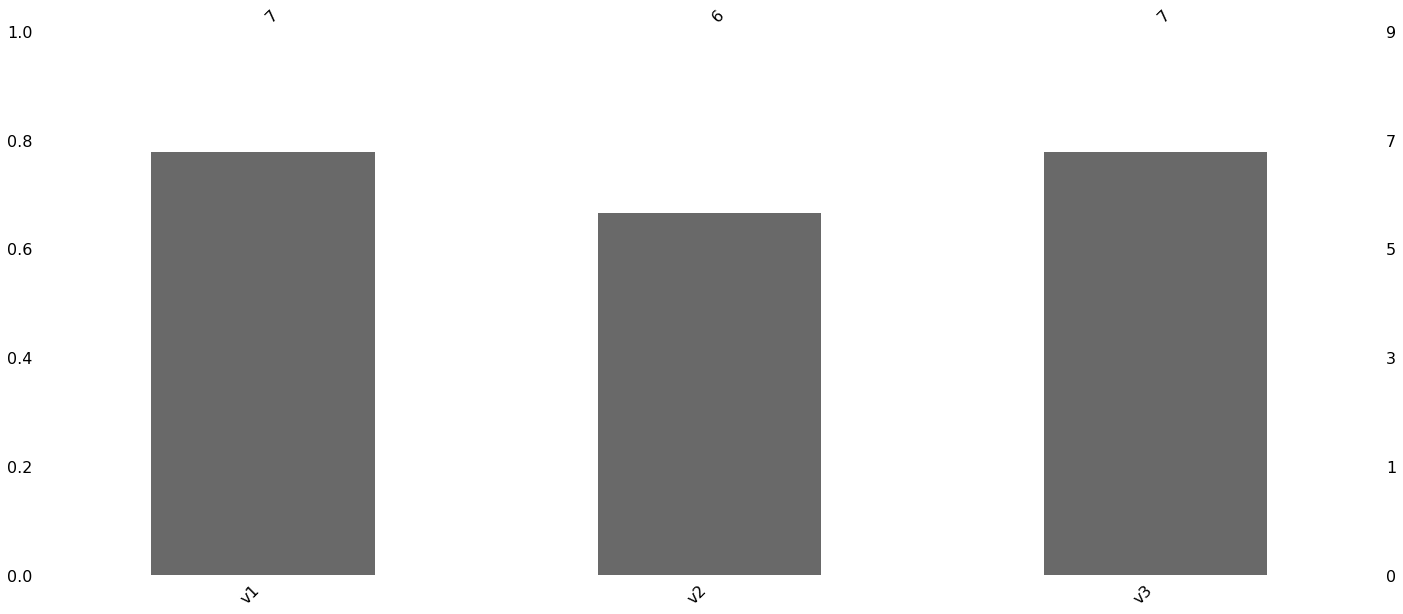

In [26]:
df = dfilk.copy()
msno.bar(df);
#üstteki sayılar kaç tane eksik gözlem olduğunu soldaki sayılar da oranını gösterir

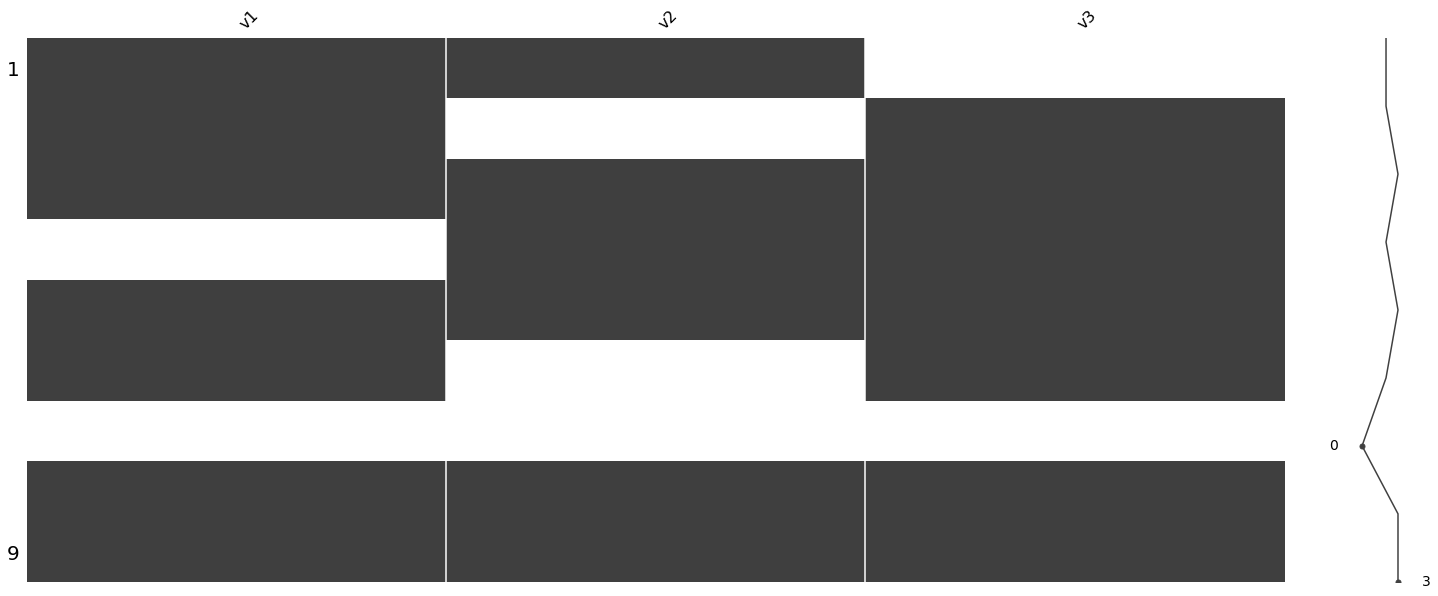

In [27]:
msno.matrix(df);
#grafikte soldaki sayılar kaçıncı satır olduğunu gösterir.
#grafikte beyaz olan kısımlar eksik değerlerin olduğu kısımları gösterir
#sağdaki değerlerde bir satırda kaç tane tam değer olduğunu gösterir.

In [28]:
import seaborn as sns
dfp = sns.load_dataset("planets")
dfp.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [29]:
dfp.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

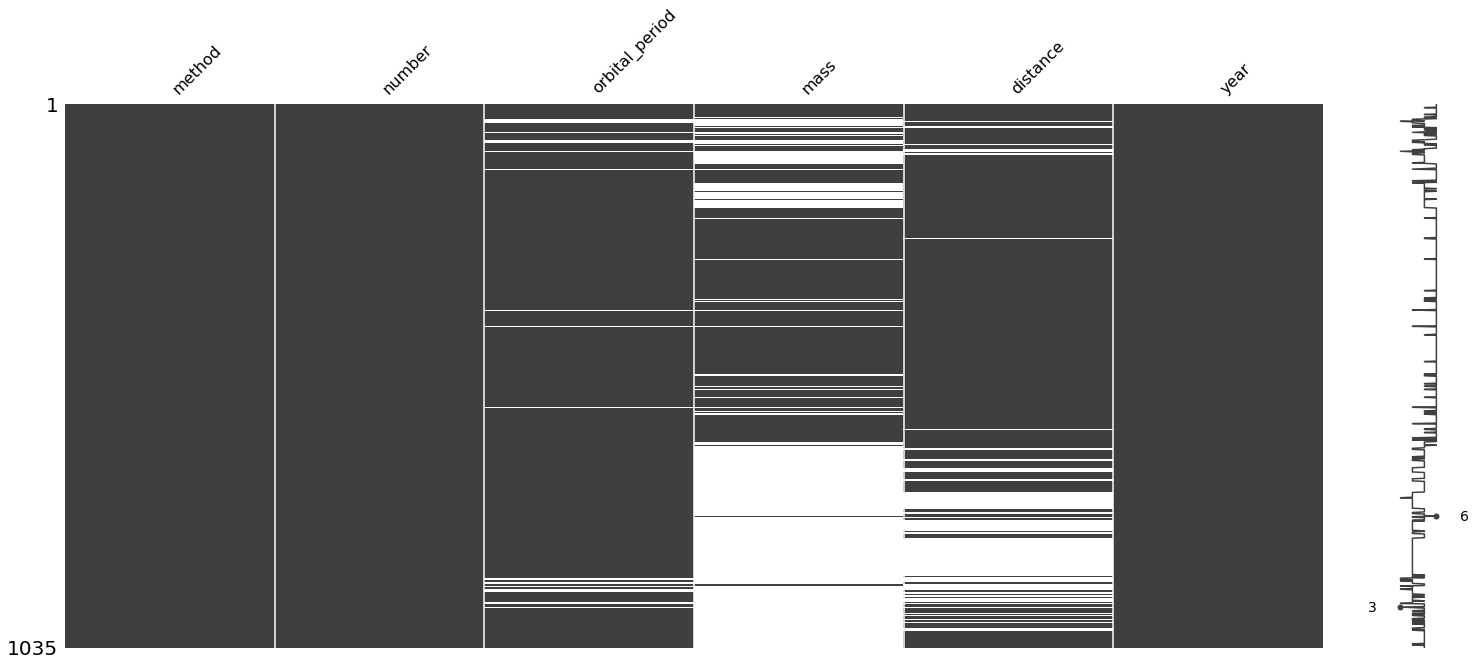

In [30]:
msno.matrix(dfp);
#grafik incelendiğinde orbital periodun ve mass değişkeninin aynı anda eksik olduğu çok yer olması bu iki değişkenin birbirine bağlı olduğunu gösterir.
#bu veri setinde eksik değerler rastgele oluşmamıştır.

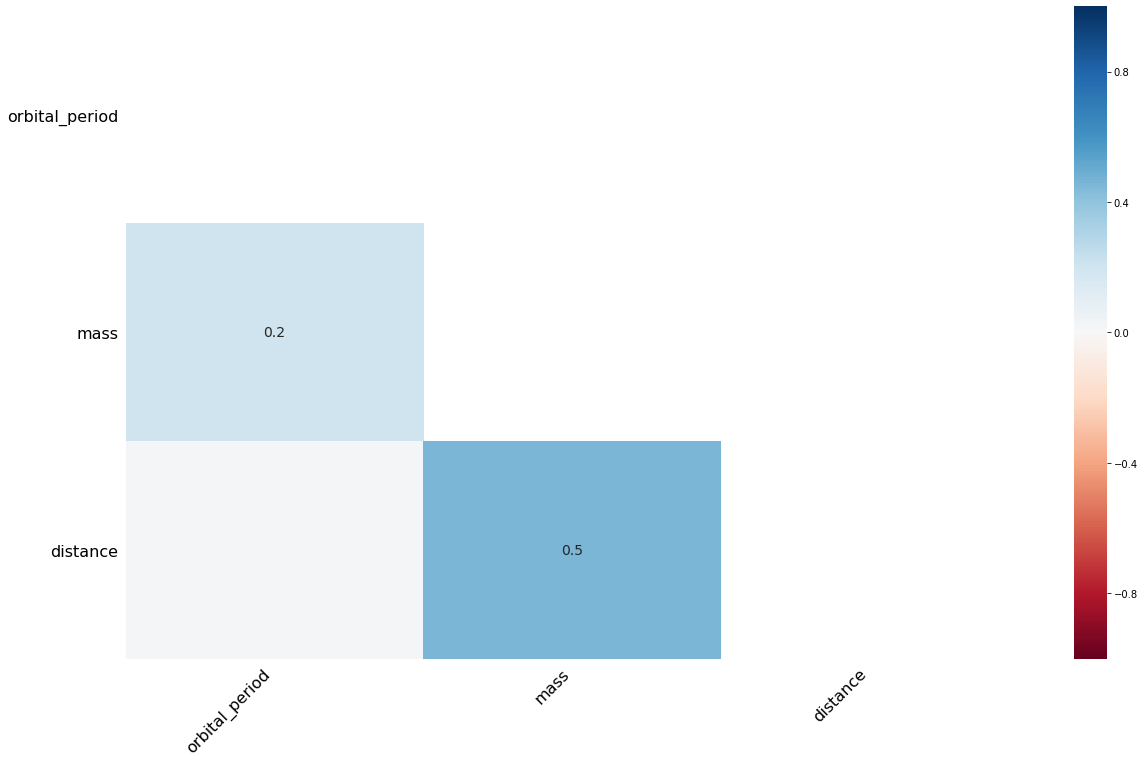

In [31]:
msno.heatmap(dfp);
#grafik değişkenlerin birbirleri arasındaki nullity korelasyonunu(eksiklik ilişkisi) değerlerini verir.
#nullity korelasyon değeri -1 ile 1 arasında değer alır.
#nullity korelasyon değeri 1 ve -1'e yaklaştıkça bir ilişki olduğu anlamına gelir.
#nullity korelasyon değeri 0 olursa hiçbir ilişkinin olmadığı anlaşılır.
#aşağıdaki grafiğe göre distance ve mass arasında orta şiddetli bir eksiklik ilişkisi vardır.
#aynı zamanda orbital period ve mass arasında da az miktarda da olsa bir eksiklik ilişkisi vardır.
#burdan eksikliklerin rastgele oluşmadığı bir ilişkiye bağlı olarak oluştuğu anlaşılır.
#bu veri seti rassal(rastgele) bir eksikliği olmayan bir veri seti olduğu için direk silmek veya ortalama ile doldurmak yanlış olur.

Kategorik Değişken Kırılımında Değer Atama

In [32]:
#bir değişkeni kategroik değişken bazında indirgeyebiliyorsa bu kategorik değişkenlere göre değer atama yapmalıyız

In [33]:
v1 = np.array([1,3,6,np.NAN,7,1,np.NAN,np.NAN,15])
v2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
v3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
v4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
dfilk = pd.DataFrame({"maaş":v1,"v2":v2,"v3":v3,"departman":v4})
df = dfilk.copy()
df

,maaş,v2,v3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [34]:
df.groupby("departman")["maaş"].mean()

departman
IK    4.666667
IT    6.333333
Name: maaş, dtype: float64

In [35]:
df["maaş"].fillna(df.groupby("departman")["maaş"].transform("mean"))
#transform fonksiyonu ile değişkene göre ortalama alınıp dolduruluyor.

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     6.333333
8    15.000000
Name: maaş, dtype: float64

Kategorik değişkenlerde eksik değerlere atama yapma

In [36]:
v1 = np.array([1,3,6,np.NAN,7,1,np.NAN,np.NAN,15])
v4 = np.array(["IT",np.NAN,"IK","IK","IK","IK","IK","IT","IT"],dtype = object)
dfilk = pd.DataFrame({"maaş":v1,"departman":v4})
df = dfilk.copy()
df

,maaş,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,NaN,IT
8,15.0,IT


In [37]:
df["departman"].fillna(df["departman"].mode()[0])
#kategorik değişkende en çok kullanılan yöntem değişkenin modunu eksik değere atamaktır.
#sonundaki 0 da sadece string değeri almak için kullanıyoruz.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [38]:
df["departman"].fillna(method = "bfill")
#kendinden sonraki değerle doldurur

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [39]:
df["departman"].fillna(method = "ffill")
#kendinden önceki değerle doldurur

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

Tahmine Dayalı Değer Atama Yöntemleri(Makine Öğrenmesi Yöntemleriyle)

In [40]:
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [41]:
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [42]:
!pip install ycimpute==0.1.1

In [43]:
#knn algoritması(makine öğrenmesi kısmında detaylı olarak öğreneceksin)
from ycimpute.imputer import knnimput

In [44]:
var_names = list(df)
#numpy arrayine çevirip işlem yapacağımız için sütun isimlerini saklamalıyız
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [45]:
n_df = np.array(df)
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [46]:
n_df.shape

(891, 6)

In [47]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.348
Imputing row 101/891 with 0 missing, elapsed time: 0.350
Imputing row 201/891 with 0 missing, elapsed time: 0.351
Imputing row 301/891 with 1 missing, elapsed time: 0.353
Imputing row 401/891 with 0 missing, elapsed time: 0.354
Imputing row 501/891 with 0 missing, elapsed time: 0.355
Imputing row 601/891 with 0 missing, elapsed time: 0.357
Imputing row 701/891 with 0 missing, elapsed time: 0.358
Imputing row 801/891 with 0 missing, elapsed time: 0.359


In [48]:
dff = pd.DataFrame(dff,columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [49]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [50]:
#randomforest algoritması
df = titanic.copy()
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [51]:
var_names = list(df)
n_df = np.array(df)

In [52]:
from ycimpute.imputer import iterforest

In [53]:
dff = iterforest.IterImput().complete(n_df)

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
dff = pd.DataFrame(dff,columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [55]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [56]:
#EM algoritması

In [57]:
df = titanic.copy()
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [58]:
from ycimpute.imputer import EM

In [59]:
varnames = list(df)

In [60]:
ndf = np.array(df)

In [61]:
dff = EM().complete(n_df)

In [62]:
dff = pd.DataFrame(dff,columns = varnames)

In [63]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [64]:
#tahmine dayalı yöntemleri bile kullancak olsak ilk önce rassallık olup olmadığını
#yani eksikliklerin rastgele oluşup oluşmadığı hangi değişkenlere bağlı olduğuna bakılmalı

Değişken Standardizasyonu(Veri Standiadizasyonu)

In [65]:
#değişken standardizasyonunda mesela değer 10 ise ve küçükten bütüğe sıralandığında 80.sırada ise değişkenin değeri değişse bile yine 80.sırada olur.
#yani dağılım bilgileri aynı şekilde kalacaktır.
#değişken dönüşümü ise örneğin yaş değişkeninde 0-10 arasını çocuk olarak 11-25 arasını genç olarak değiştirmek gibi değişkenin yapısını değiştirmektir.
#yani değişken dönüşümünde bazen de temsil şeklini değiştirmiş oluruz.
#her bir standardizasyon aynı zamanda bir değişken dönüşümüdür.
v1 = np.array([1,3,6,5,7])
v2 = np.array([7,7,5,8,12])
v3 = np.array([6,12,5,6,14])
dfilk = pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
df = dfilk.copy()
df = df.astype(float)
df

,v1,v2,v3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [66]:
from sklearn import preprocessing

In [67]:
preprocessing.scale(df)#orjinal yapısını bozmaz
#değerleri -3 3 aralığında standartlaştırır.

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [68]:
#bazı algoritmaları kullanırken algoritmayı zorlamamak için bu standardizasyonu yapmamız gerekir

In [69]:
df

,v1,v2,v3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


Normalizasyon

In [70]:
#değerleri 0-1 arasına dönüştürmek için kullanılır

In [71]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

Min-Max Dönüşümü

In [72]:
#kendi belirlemiş olduğumuz iki aralık arasına değerleri dönüştürmek için kullanılır

In [73]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))
#burda bir dönüştürücü fonksiyon oluşturmuş olduk

In [74]:
scaler.fit_transform(df)
#burda da df Dataframeini bu fonksiyona sokmuş olduk

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

Değişken Dönüşümleri

In [75]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Binarize Dönüşüm

In [87]:
v1 = np.array([1,3,6,5,7])
v2 = np.array([7,7,5,8,12])
v3 = np.array([6,12,5,6,14])
dfb = pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
dfb = dfb.astype(float)
dfb

,v1,v2,v3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [91]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(dfb)
#eşik değerin üstündeki değerleri 1 altındaki ve eşit olan değerleri 0 yapar

In [92]:
binarizer.transform(dfb)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

0-1 Dönüşümü

In [77]:
#çok sık kullanılır.İki sınıflı değişkenlerde fonksiyonların beklediği formata göre dönüşüm yapmamızı sağlar

In [96]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [97]:
lbe.fit_transform(df.sex)
#ilk yakaladığı değeri 0 yapar
#bu değişken ana veri seti üzerinde değişiklik yapmaz
#mantıklı olan hem yeni değişkenleri hem de bunun eski hallerinin veri setinde kalmasını sağlamaktır

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [98]:
df["ycinsiyet"] = lbe.fit_transform(df.sex)
#dönüştürdüğümüz değişkenlerde hangi değişkene 1 hangi değişkene 0 geldiğine dikkat etmeliyiz

In [99]:
df

,total_bill,tip,sex,smoker,day,time,size,2.yenic,ycinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1


In [100]:
#2.yol

In [101]:
df["2.yenic"] = df.sex.cat.codes
#ilk yakaladığı değeri 1 yapar.

In [102]:
df

,total_bill,tip,sex,smoker,day,time,size,2.yenic,ycinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1


1 ve diğerleri(0) Dönüşümü

In [90]:
#3-4 sınıflı bir değişkende bir değere odaklanmak istendiğinde kullanılır.
df.head()

,total_bill,tip,sex,smoker,day,time,size,ycinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [94]:
df.day.str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [95]:
df["yday"] = np.where(df.day.str.contains("Sun"),1,0)
#true dönenlere 1 diğerlerine 0 verir
df

,total_bill,tip,sex,smoker,day,time,size,ycinsiyet,yday
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1,1


Çok Sınıflı Dönüşüm

In [96]:
lbe.fit_transform(df.day)
#Label Encoder fonksiyonu değişkendeki değer çeşidi kadar 0'dan başlayarak değer verir
#Örneğin day değişkeninde Thursday,Friday,Saturday ve Sunday değişkenleri olduğu için hepsine 0,1,2,3 değerlerini vermiştir.

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [97]:
df["çokgün"] = lbe.fit_transform(df.day)
df
#Thursday 3 , Sunday 2 , Saturday 1 , Friday 0 değerlerini almış.

,total_bill,tip,sex,smoker,day,time,size,ycinsiyet,yday,çokgün
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2
5,25.29,4.71,Male,No,Sun,Dinner,4,1,1,2
6,8.77,2.00,Male,No,Sun,Dinner,2,1,1,2
7,26.88,3.12,Male,No,Sun,Dinner,4,1,1,2
8,15.04,1.96,Male,No,Sun,Dinner,2,1,1,2
9,14.78,3.23,Male,No,Sun,Dinner,2,1,1,2


In [98]:
#bu değiştirme işlemine çok dikkat edilmeli çünkü bu değişkenler arasındaki bağımlılıkları ve ilişkileri değiştirir.
#Mesela burda nominal bir değişkeni sayısal hale çevirdiğimiz için burda sayılar artıp azalabiliyor gibi duruyor fakat kategorik değişkenimizde böyle bir şey yoktu.
#Bu durum çok değişkenli donüşümlerde gürültülere yanlı sonuç ve yanlış hesaplamalara neden olabilir.
#Bu durumlarda da One Hot dönüşümü kullanılmalıdır.

One Hot Dönüşümü ve Dummy Değişken Tuzağı

In [99]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,ycinsiyet,yday,çokgün
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [100]:
dfonehot = pd.get_dummies(df, columns = ["sex"],prefix = ["cinsiyet"])
#bu dönüşümde prefix yeni oluşturulan değişkenlerdeki isimlendirmeyi ifade eder
#bu dönüşümde de normal sex değişkenini siler ve onu male ve female olarak iki değişkene ayırır
#bu dönüşüm sayesinde kategorik değişkenler üzerinde de nümerik olarak işlem yapma imkanı sağlar ve kategorik değişkenlerin veri seti üzerinde etkisini daha baskın olarak göstermesini sağlar. 

In [101]:
dfonehot

,total_bill,tip,smoker,day,time,size,ycinsiyet,yday,çokgün,cinsiyet_Male,cinsiyet_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,2,0,1
5,25.29,4.71,No,Sun,Dinner,4,1,1,2,1,0
6,8.77,2.00,No,Sun,Dinner,2,1,1,2,1,0
7,26.88,3.12,No,Sun,Dinner,4,1,1,2,1,0
8,15.04,1.96,No,Sun,Dinner,2,1,1,2,1,0
9,14.78,3.23,No,Sun,Dinner,2,1,1,2,1,0


In [102]:
#burda da dummy değişken tuzağı sorun olur
#bu da bir değişkeni ifade eden başka bir değişken olduğunda ortaya çıkar
#yani mesela cinsiyet_Male değişkeni üzerinden cinsiyet_Female değişkenini de oluşturabiliriz
#Çünkü biri 1 olduğunda diğeri 0 diğeri 0 olduğunda bu 1 olur.İki değişken de aynı şeyi ifade etmiş oluyor.
#Bu duruma dummy değişken tuzağı denir.
#Bunu engellemek için değişken çeşit sayısından daha az değişken oluşturmalıyız.Fakat değişken türü sayısı arttıkça değişkenler birbiri üzerinden oluşması zorlaşacağı için değişken sayısını azaltmaya gerek kalmaz.
#Ayrıca ilk değişken de kesinlikle veri setinden silinmelidir.

In [103]:
dfonehot2 = pd.get_dummies(df, columns = ["day"],prefix = ["gün"])

In [104]:
dfonehot2

,total_bill,tip,sex,smoker,time,size,ycinsiyet,yday,çokgün,gün_Thur,gün_Fri,gün_Sat,gün_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,2,0,0,0,1
5,25.29,4.71,Male,No,Dinner,4,1,1,2,0,0,0,1
6,8.77,2.00,Male,No,Dinner,2,1,1,2,0,0,0,1
7,26.88,3.12,Male,No,Dinner,4,1,1,2,0,0,0,1
8,15.04,1.96,Male,No,Dinner,2,1,1,2,0,0,0,1
9,14.78,3.23,Male,No,Dinner,2,1,1,2,0,0,0,1


Sürekli Değişkenleri Kategorik Değişkene Çevirme

In [107]:
dff = df.select_dtypes(include = ["int64","float64"])
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2],encode = "ordinal" , strategy = "quantile").fit(dff)
#farklı strategyler var onlara da bakıp en mantıklısını bulabilirsin.

In [108]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [ ]:
#çok gerekmedikçe yapılmaması gerekir çünkü sürekli değişkenin yapısını değiştirmiş oluruz
#yapılıcaksa bile testler yapılıp kontroller yapılarak dönüşüm yapılmalı

Değişkeni indexe indexi değişkene çevirme

In [110]:
df["yeni"] = df.index

In [111]:
df

,total_bill,tip,sex,smoker,day,time,size,2.yenic,ycinsiyet,yeni
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,3
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,4
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,5
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,6
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,7
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,8
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,9


In [112]:
df.index = df.time

In [113]:
df

,total_bill,tip,sex,smoker,day,time,size,2.yenic,ycinsiyet,yeni
time,,,,,,,,,,
Dinner,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0
Dinner,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
Dinner,21.01,3.50,Male,No,Sun,Dinner,3,0,1,2
Dinner,23.68,3.31,Male,No,Sun,Dinner,2,0,1,3
Dinner,24.59,3.61,Female,No,Sun,Dinner,4,1,0,4
Dinner,25.29,4.71,Male,No,Sun,Dinner,4,0,1,5
Dinner,8.77,2.00,Male,No,Sun,Dinner,2,0,1,6
Dinner,26.88,3.12,Male,No,Sun,Dinner,4,0,1,7
Dinner,15.04,1.96,Male,No,Sun,Dinner,2,0,1,8


In [ ]:
#dfte index üstünde değişim yapmadan önce eski değişkenleri kaydetmeyi unutma